# Alzheimer’s Disease (CDC Data)

### The number of older adults with Alzheimer’s disease is expected to nearly triple over the next 40 years

### Among people ages 65 and older, the largest percentage of those with the diseases were African Americans (14 percent), followed by Hispanics (12 percent), and non-Hispanic whites (10 percent).


# CDC Graphic
<div style="width: 500px;">
<img src="https://www.cdc.gov/aging/publications/images/alzheimers-disease-dementia_900px.png?_=86223" alt="Image Description">
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
df.shape

(2149, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
df = df.dropna()

In [6]:
df = df.drop(["PatientID", "DoctorInCharge"], axis=1)

df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [7]:
df.shape

(2149, 33)

In [8]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [9]:
#One-Hot Encode Ethnicity

df = pd.get_dummies(df, columns=["Ethnicity"], dtype=int)

In [10]:
df.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,73,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,...,0,0,0,1,0,0,1,0,0,0
1,89,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,...,0,0,0,0,1,0,1,0,0,0
2,73,0,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,...,0,1,0,1,0,0,0,0,0,1
3,74,1,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,...,0,0,0,0,0,0,1,0,0,0
4,89,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,...,0,0,1,1,0,0,1,0,0,0


In [11]:
#Create new feature for Average Overall health, combine PhysicalActivity, DietQuality, and SleepQuality
#into a new feature to capture the overall health individuals

df['OverallHealth'] = (df['PhysicalActivity'] + df['DietQuality'] + df['SleepQuality']) / 3

In [12]:
df.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,OverallHealth
0,73,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,...,0,0,1,0,0,1,0,0,0,5.566668
1,89,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,...,0,0,0,1,0,1,0,0,0,5.096648
2,73,0,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,...,1,0,1,0,0,0,0,0,1,6.448299
3,74,1,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,...,0,0,0,0,0,1,0,0,0,8.085386
4,89,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,...,0,1,1,0,0,1,0,0,0,4.234399


In [13]:
df = df.drop(["PhysicalActivity", "DietQuality", "SleepQuality"], axis=1)

df.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,...,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,OverallHealth
0,73,0,2,22.927749,0,13.297218,0,0,1,1,...,0,0,1,0,0,1,0,0,0,5.566668
1,89,0,0,26.827681,0,4.542524,0,0,0,0,...,0,0,0,1,0,1,0,0,0,5.096648
2,73,0,1,17.795882,0,19.555085,1,0,0,0,...,1,0,1,0,0,0,0,0,1,6.448299
3,74,1,1,33.800817,1,12.209266,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8.085386
4,89,0,0,20.716974,0,18.454356,0,0,0,0,...,0,1,1,0,0,1,0,0,0,4.234399


In [14]:
#Create new feature for Simple Average of OveralLifestyle, combine BMI, Smoking, and AlcoholConsumption into a new feature to capture the overall lifestyle of individuals
df['OveralLifestyle'] = (df['BMI'] + df['Smoking'] + df['AlcoholConsumption']) / 3

In [15]:
df = df.drop(["BMI", "Smoking", "AlcoholConsumption"], axis=1)

In [16]:
df.head()

,Age,Gender,EducationLevel,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,...,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,OverallHealth,OveralLifestyle
0,73,0,2,0,0,1,1,0,0,142,...,0,1,0,0,1,0,0,0,5.566668,12.074989
1,89,0,0,0,0,0,0,0,0,115,...,0,0,1,0,1,0,0,0,5.096648,10.456735
2,73,0,1,1,0,0,0,0,0,99,...,0,1,0,0,0,0,0,1,6.448299,12.450322
3,74,1,1,0,0,0,0,0,0,118,...,0,0,0,0,1,0,0,0,8.085386,15.670028
4,89,0,0,0,0,0,0,0,0,94,...,1,1,0,0,1,0,0,0,4.234399,13.057110


In [17]:
df['OverallHealth'].unique()

array([5.56666848, 5.09664814, 6.44829887, ..., 7.92516346, 5.31352773,
       8.13036926])

#### This scatter plot examines the relationship between age and overall health for individuals in the dataset. The data points are colored based on their diagnosis.  Blue points represent individuals diagnosed with Alzheimer's (Diagnosis = 1), while orange points represent those without Alzheimer's (Diagnosis = 0). The transparency (alpha) is set to 0.2 for better visibility of overlapping points, and the size of each point is set to 100.

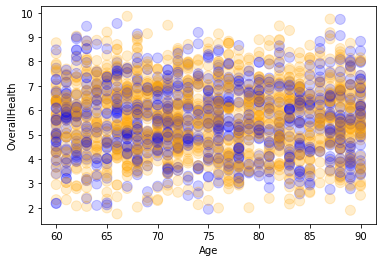

In [18]:
fig, ax = plt.subplots()

# Add titles to the axes
plt.xlabel("Age")
plt.ylabel("OverallHealth")


# Create a color array based on the Diagnosis, blue means they have Alzheimer's
colors = ['blue' if diagnosis == 1 else 'orange' for diagnosis in df['Diagnosis']]

# Plot the scatter plot with conditional colors
ax.scatter(df['Age'], df['OverallHealth'], alpha=.2, s=100, c=colors)

plt.show()

In [19]:
df['Age'].unique()

array([73, 89, 74, 86, 68, 75, 72, 87, 78, 84, 64, 69, 63, 65, 82, 77, 71,
       83, 79, 67, 66, 70, 85, 60, 88, 62, 81, 61, 80, 90, 76])

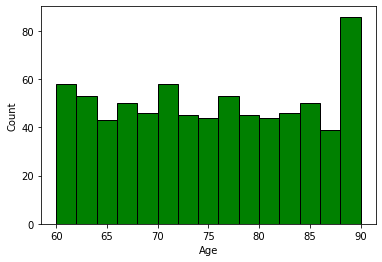

In [20]:
fig, ax = plt.subplots()

# Add titles to the axes
plt.xlabel("Age")
plt.ylabel("Count")

ax.hist(df.loc[df['Diagnosis'] == 1, "Age"], color='green', edgecolor='black',  bins=15);

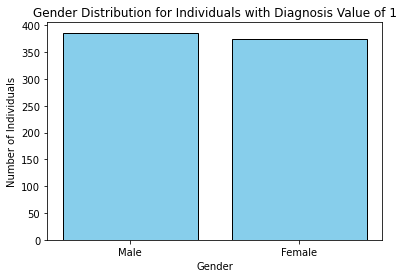

In [21]:
# Filter the dataframe for rows where Diagnosis is 1
df_filtered = df[df['Diagnosis'] == 1]

# Count the occurrences of each gender within the filtered dataframe
gender_counts = df_filtered['Gender'].value_counts()

# Map the numeric values to their corresponding gender labels
gender_labels = {0: 'Male', 1: 'Female'}
gender_counts.index = gender_counts.index.map(gender_labels)

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(gender_counts.index, gender_counts.values, color='skyblue', edgecolor='black')

# Add labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Individuals')
ax.set_title('Gender Distribution for Individuals with Diagnosis Value of 1')

plt.show()

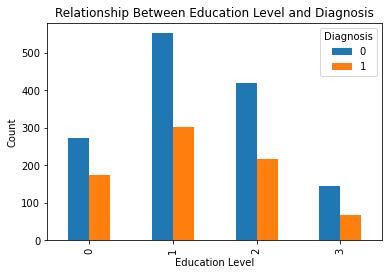

In [22]:
# Group the data by EducationLevel and count the occurrences of each Diagnosis
grouped_data = df.groupby('EducationLevel')['Diagnosis'].value_counts().unstack()

# Create a bar chart
grouped_data.plot(kind='bar')

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Relationship Between Education Level and Diagnosis')

# Show the plot
plt.show()

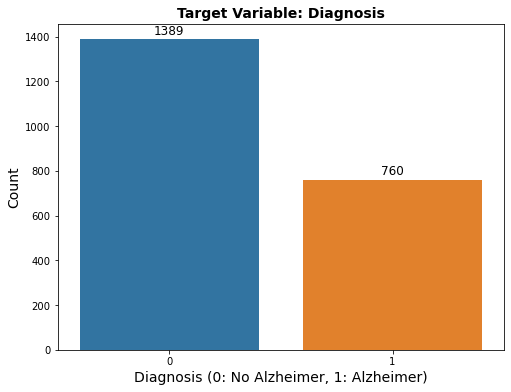

In [30]:
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 

# Create a count plot for the Diagnosis variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=df)

# Adding title and labels with enhanced formatting
plt.title('Target Variable: Diagnosis', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis (0: No Alzheimer, 1: Alzheimer)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding count numbers on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

# Display the plot
plt.grid(False)
plt.show()

## Notes for below Heatmap: 

Darker blue: Negative correlation, meaning as one variable increases, the other decreases.
Lighter blue: Weaker negative correlation.
White: No correlation.
Light green: Weaker positive correlation.
Darker green: Positive correlation, meaning as one variable increases, the other also increases.
From the heatmap, we can see that:

Age has a strong positive correlation with Cardiovascular Disease, Hypertension, DiastolicBP, Cholesterol LDL, Cholesterol Triglycerides, and OverallHealth. This suggests that as people get older, they are more likely to experience these health conditions.
EducationLevel has a strong negative correlation with OverallHealth. This could indicate that higher education levels are associated with better overall health.
Cardiovascular Disease has strong positive correlations with Hypertension, DiastolicBP, Cholesterol LDL, and Cholesterol Triglycerides, suggesting that these conditions are often interrelated.
Depression has a weak negative correlation with EducationLevel and a weak positive correlation with OverallHealth.
Hypertension has a strong positive correlation with DiastolicBP, Cholesterol LDL, and Cholesterol Triglycerides.
PersonalityChanges has a strong negative correlation with OverallHealth, suggesting that personality changes are often associated with poorer overall health.

The intersection of "Ethnicity 0" and "Diagnosis" in the heatmap shows a strong positive correlation between these two variables. This suggests that individuals belonging to the "Ethnicity 0" group are significantly more likely to be diagnosed with Alzheimer.

<AxesSubplot:>

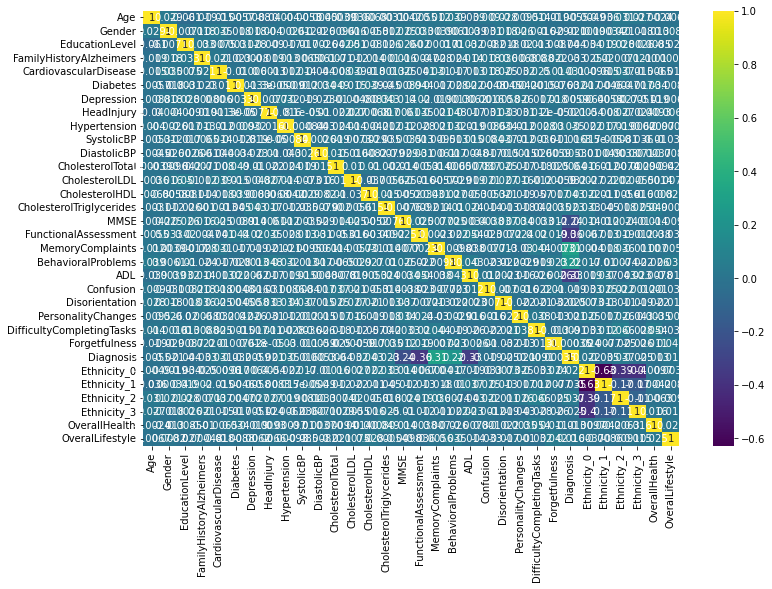

In [31]:
# Calculate the correlation matrix and create the heatmap
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

In [ ]:
# move the target variable Diagnosis to the end
feature_order = [feature for feature in list(df.columns) if feature not in ["Diagnosis"]] + ["Diagnosis"]

df = df[feature_order]

df.head()

In [ ]:
# Capital X indicates all of the features that the algorithm will be given to learn from.
# This code X = df.iloc[:, :-1].values takes all the features except the last one from the DataFrame df
X = df.iloc[:, :-1].values

# Lowercase y indicates the target variable, the classifications that you would like to predict.  
y = df.iloc[:, -1].values

In [ ]:
# Preview the first 10 rows

X[:10]

In [ ]:
from sklearn.model_selection import train_test_split

#Specifies that 25% of the data should be used for testing, while the remaining 75% is used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [ ]:
# Standardize the features so that they are all on the same scale (between -3 and 3)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train_std, y_train, scoring='accuracy', cv=10)

In [ ]:
# Show how the model performed over the 10 folds

scores

In [ ]:
# Show the mean of the 10 folds

scores.mean()

In [ ]:
# 10-fold cross validation with a list of algorithms

classifiers = [log_reg, knn, svm, forest]

model_scores = [cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10) for clf in classifiers]
model_scores

In [ ]:
# use a DataFrame to view the cross validation results

models_df = pd.DataFrame(data=model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest"])
models_df

In [ ]:
models_df["Mean"] = models_df.mean(axis=1)
models_df

In [ ]:
# BOXPLOT - visually comparing performance of the models

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))

# rectangular box plot
# place the cross-validated model_scores list from above
# into bplot_models here ------->
                           ##############
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)
                           ##############
    
# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'KNN', 'SVM', 'RF'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)

In [ ]:
# standardize X (the full dataset)
    # using the mean and standard deviation from the training set
    
X_std = stdsc.fit_transform(X)
y = df.iloc[:, -1].values

forest.fit(X_std, y);

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train);

In [ ]:
log_reg.score(X_train_std, y_train)

In [ ]:
log_reg.score(X_test_std, y_test)